In [1]:
import pandas as pd
import yfinance as yf
from datetime import timedelta
import pandas_ta as ta


In [2]:
tickers = ['TSLA', 'RIVN', 'AAPL','NVDA']
years = 5

In [3]:
def data_download_daily(tickers, years):
    today = pd.Timestamp.today()
    days_in_years = 365*years
    start_date = (today - timedelta(days=days_in_years)).strftime('%Y-%m-%d')
    end_date = today
    days_in_years = 365*years
    prices_df = pd.DataFrame()
    for ticker in tickers:
        data = yf.download(ticker, start = start_date, end= end_date, interval='1D')
        prices_df[ticker] = data['Adj Close']
    return prices_df


In [4]:
prices_df = data_download_daily(tickers=tickers, years=years)
prices_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,RIVN,AAPL,NVDA
Date,,,,
2019-03-04 00:00:00-05:00,19.024000,NaN,42.322655,38.930637
2019-03-05 00:00:00-05:00,18.436001,NaN,42.245632,38.866074
2019-03-06 00:00:00-05:00,18.416000,NaN,42.002548,37.756107
2019-03-07 00:00:00-05:00,18.439333,NaN,41.516396,37.063313
2019-03-08 00:00:00-05:00,18.942667,NaN,41.615063,37.405987
...,...,...,...,...
2024-02-26 00:00:00-05:00,199.399994,10.70,181.160004,790.919983
2024-02-27 00:00:00-05:00,199.729996,11.14,182.630005,787.010010
2024-02-28 00:00:00-05:00,202.039993,11.30,181.419998,776.630005


In [5]:
def calculate_my_strategy(input_df):
    strat = input_df.copy()
    for ticker in input_df.columns:
        strat[ticker + '_upper_50'] =   strat[ticker].rolling(window = 45).mean() + abs(strat[ticker].rolling(window = 90).mean())*0.5
        strat[ticker + '_lower_50'] =   strat[ticker].rolling(window = 45).mean() - abs(strat[ticker].rolling(window = 90).mean())*0.5
        strat[ticker + '_rolling_50'] = strat[ticker].rolling(window = 50).mean()
    return strat

In [6]:
my_strat = calculate_my_strategy(prices_df)
my_strat

,TSLA,RIVN,AAPL,NVDA,TSLA_upper_50,TSLA_lower_50,TSLA_rolling_50,RIVN_upper_50,RIVN_lower_50,RIVN_rolling_50,AAPL_upper_50,AAPL_lower_50,AAPL_rolling_50,NVDA_upper_50,NVDA_lower_50,NVDA_rolling_50
Date,,,,,,,,,,,,,,,,
2019-03-04 00:00:00-05:00,19.024000,NaN,42.322655,38.930637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-05 00:00:00-05:00,18.436001,NaN,42.245632,38.866074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-06 00:00:00-05:00,18.416000,NaN,42.002548,37.756107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-07 00:00:00-05:00,18.439333,NaN,41.516396,37.063313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-08 00:00:00-05:00,18.942667,NaN,41.615063,37.405987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,199.399994,10.70,181.160004,790.919983,323.292389,101.811611,216.3596,26.170833,8.609611,17.9130,280.640365,94.477495,188.507294,876.655810,341.409520,597.131199
2024-02-27 00:00:00-05:00,199.729996,11.14,182.630005,787.010010,321.932611,101.064278,215.5684,25.854611,8.390722,17.7422,280.407764,94.178909,188.205740,885.385081,346.275806,603.253799
2024-02-28 00:00:00-05:00,202.039993,11.30,181.419998,776.630005,320.541055,100.124277,214.5882,25.544000,8.155556,17.5196,280.152140,93.856228,187.876989,893.727454,350.676989,609.116399


In [7]:
prices_df

,TSLA,RIVN,AAPL,NVDA
Date,,,,
2019-03-04 00:00:00-05:00,19.024000,NaN,42.322655,38.930637
2019-03-05 00:00:00-05:00,18.436001,NaN,42.245632,38.866074
2019-03-06 00:00:00-05:00,18.416000,NaN,42.002548,37.756107
2019-03-07 00:00:00-05:00,18.439333,NaN,41.516396,37.063313
2019-03-08 00:00:00-05:00,18.942667,NaN,41.615063,37.405987
...,...,...,...,...
2024-02-26 00:00:00-05:00,199.399994,10.70,181.160004,790.919983
2024-02-27 00:00:00-05:00,199.729996,11.14,182.630005,787.010010
2024-02-28 00:00:00-05:00,202.039993,11.30,181.419998,776.630005


In [8]:
def calculate_donchian(prices_df):
    donchian_df = pd.DataFrame(index=prices_df.index)  # DataFrame to store Donchian channels
    for ticker in prices_df.columns:
            donchian_df[[f"{ticker}_dcl",f"{ticker}_dcm", f"{ticker}_dcu"]] = prices_df.ta.donchian(high = prices_df[ticker], low = prices_df[ticker], lower_length = 40, upper_length = 40)

    return donchian_df

In [9]:
donchain_df = calculate_donchian(prices_df)
donchain_df.tail(5)

,TSLA_dcl,TSLA_dcm,TSLA_dcu,RIVN_dcl,RIVN_dcm,RIVN_dcu,AAPL_dcl,AAPL_dcm,AAPL_dcu,NVDA_dcl,NVDA_dcm,NVDA_dcu
Date,,,,,,,,,,,,
2024-02-26 00:00:00-05:00,181.059998,217.119995,253.179993,10.07,16.805000,23.540001,180.949097,187.940178,194.931259,475.690002,633.304993,790.919983
2024-02-27 00:00:00-05:00,181.059998,214.769997,248.479996,10.07,16.764999,23.459999,180.949097,187.940178,194.931259,475.690002,633.304993,790.919983
2024-02-28 00:00:00-05:00,181.059998,214.739998,248.419998,10.07,15.585000,21.100000,180.949097,187.940178,194.931259,475.690002,633.304993,790.919983
2024-02-29 00:00:00-05:00,181.059998,210.754997,240.449997,10.07,15.195000,20.320000,180.750000,187.840630,194.931259,475.690002,633.404999,791.119995
2024-03-01 00:00:00-05:00,181.059998,210.754997,240.449997,10.07,14.825000,19.580000,179.660004,187.295631,194.931259,479.980011,651.384995,822.789978


In [10]:
prices_df

,TSLA,RIVN,AAPL,NVDA
Date,,,,
2019-03-04 00:00:00-05:00,19.024000,NaN,42.322655,38.930637
2019-03-05 00:00:00-05:00,18.436001,NaN,42.245632,38.866074
2019-03-06 00:00:00-05:00,18.416000,NaN,42.002548,37.756107
2019-03-07 00:00:00-05:00,18.439333,NaN,41.516396,37.063313
2019-03-08 00:00:00-05:00,18.942667,NaN,41.615063,37.405987
...,...,...,...,...
2024-02-26 00:00:00-05:00,199.399994,10.70,181.160004,790.919983
2024-02-27 00:00:00-05:00,199.729996,11.14,182.630005,787.010010
2024-02-28 00:00:00-05:00,202.039993,11.30,181.419998,776.630005


In [11]:
def backtest(reference, ticker, trades):
    max_drawdown=0
    longest_hold=0
    shortest_hold=0
    average_drawdown=0
    max_gain=0
    total_gain= 0

My strategy

In [12]:
merge = pd.merge(my_strat, donchain_df, how='left', left_index=True, right_index=True)
merge

,TSLA,RIVN,AAPL,NVDA,TSLA_upper_50,TSLA_lower_50,TSLA_rolling_50,RIVN_upper_50,RIVN_lower_50,RIVN_rolling_50,...,TSLA_dcu,RIVN_dcl,RIVN_dcm,RIVN_dcu,AAPL_dcl,AAPL_dcm,AAPL_dcu,NVDA_dcl,NVDA_dcm,NVDA_dcu
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-04 00:00:00-05:00,19.024000,NaN,42.322655,38.930637,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-05 00:00:00-05:00,18.436001,NaN,42.245632,38.866074,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-06 00:00:00-05:00,18.416000,NaN,42.002548,37.756107,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-07 00:00:00-05:00,18.439333,NaN,41.516396,37.063313,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-08 00:00:00-05:00,18.942667,NaN,41.615063,37.405987,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,199.399994,10.70,181.160004,790.919983,323.292389,101.811611,216.3596,26.170833,8.609611,17.9130,...,253.179993,10.07,16.805000,23.540001,180.949097,187.940178,194.931259,475.690002,633.304993,790.919983
2024-02-27 00:00:00-05:00,199.729996,11.14,182.630005,787.010010,321.932611,101.064278,215.5684,25.854611,8.390722,17.7422,...,248.479996,10.07,16.764999,23.459999,180.949097,187.940178,194.931259,475.690002,633.304993,790.919983
2024-02-28 00:00:00-05:00,202.039993,11.30,181.419998,776.630005,320.541055,100.124277,214.5882,25.544000,8.155556,17.5196,...,248.419998,10.07,15.585000,21.100000,180.949097,187.940178,194.931259,475.690002,633.304993,790.919983


In [13]:
tsla = merge.filter(regex='TSLA')
tsla['TSLA_upper_dcu'] = tsla['TSLA_dcu'] - (tsla['TSLA_dcu'] - tsla['TSLA_dcm'])*0.3
tsla['TSLA_lower_dcl'] = tsla['TSLA_dcl'] + (tsla['TSLA_dcm'] - tsla['TSLA_dcl'])*0.3

tsla

/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_62006/4138719673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla['TSLA_upper_dcu'] = tsla['TSLA_dcu'] - (tsla['TSLA_dcu'] - tsla['TSLA_dcm'])*0.3
/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_62006/4138719673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla['TSLA_lower_dcl'] = tsla['TSLA_dcl'] + (tsla['TSLA_dcm'] - tsla['TSLA_dcl'])*0.3


,TSLA,TSLA_upper_50,TSLA_lower_50,TSLA_rolling_50,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl
Date,,,,,,,,,
2019-03-04 00:00:00-05:00,19.024000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-05 00:00:00-05:00,18.436001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-06 00:00:00-05:00,18.416000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-07 00:00:00-05:00,18.439333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-08 00:00:00-05:00,18.942667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,199.399994,323.292389,101.811611,216.3596,181.059998,217.119995,253.179993,242.361993,191.877997
2024-02-27 00:00:00-05:00,199.729996,321.932611,101.064278,215.5684,181.059998,214.769997,248.479996,238.366996,191.172997
2024-02-28 00:00:00-05:00,202.039993,320.541055,100.124277,214.5882,181.059998,214.739998,248.419998,238.315998,191.163998


In [14]:
tsla = tsla[tsla.index >= '2020-01-01']
tsla.columns

Index(['TSLA', 'TSLA_upper_50', 'TSLA_lower_50', 'TSLA_rolling_50', 'TSLA_dcl',
       'TSLA_dcm', 'TSLA_dcu', 'TSLA_upper_dcu', 'TSLA_lower_dcl'],
      dtype='object')

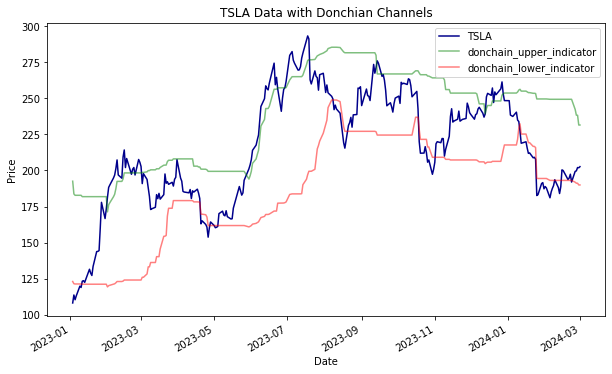

In [17]:
import matplotlib.pyplot as plt

# Plot the graph with customized colors and transparency
tsla_plot = tsla[['TSLA', 'TSLA_upper_50', 'TSLA_lower_50', 'TSLA_rolling_50', 'TSLA_dcl', 'TSLA_dcm', 'TSLA_dcu','TSLA_upper_dcu', 'TSLA_lower_dcl']]
tsla_plot = tsla_plot[tsla_plot.index >= '2023-01-01']
tsla_plot['TSLA'].plot(color='darkblue', figsize=(10, 6), label='TSLA')
# tsla_plot['TSLA_rolling_50'].plot(color='orange', label='Rolling Mean')
# tsla_plot['TSLA_dcl'].plot(color='lightblue', label='Donchian Lower', linewidth=1)  # Donchian channels as filled area
# tsla_plot['TSLA_dcu'].plot(color='lightblue', label='Donchian Upper', linewidth=1)  # Donchian channels as filled area
# tsla_plot['TSLA_dcm'].plot(color='purple', label='Donchian Middle')
tsla_plot['TSLA_upper_dcu'].plot(color = 'green', label = 'donchain_upper_indicator', alpha = 0.5)
tsla_plot['TSLA_lower_dcl'].plot(color = 'red', label = 'donchain_lower_indicator',alpha = 0.5)


# Add legend
plt.legend()

# Add title and labels
plt.title('TSLA Data with Donchian Channels')
plt.xlabel('Date')
plt.ylabel('Price')

# Show the plot
plt.show()


1. if lower donchian indicator is crossed from bottom hold until it crosses donchian upper indicator
2. if upper donchian indicator is crossed from the top, hold until its crossed from below the lower donchian indicator 

long position column where it says true if open position is opened

short position column where it says true if short postion is opened 

obviously both of them are opened as long as they are not closed 

for my case when one is closed second is opened

longest position is when you have the most consecutive true values for either of those columns

biggest drawdown is when you have the biggest difference form the last highest position in the position, if it dips after peaking during long position or peaks after dipin during a short position

average drawdown is sum of all drawdowns devided by the sum of drawdowns (non 0 values in drawdown column)

max gain and average gain is the opposite of drawdowns

all of these need separate columns